In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import statistics 
from scipy.stats import norm 
from scipy.stats import chi2
from scipy.stats import cauchy

# Esercitazione 4

## Stato solido 

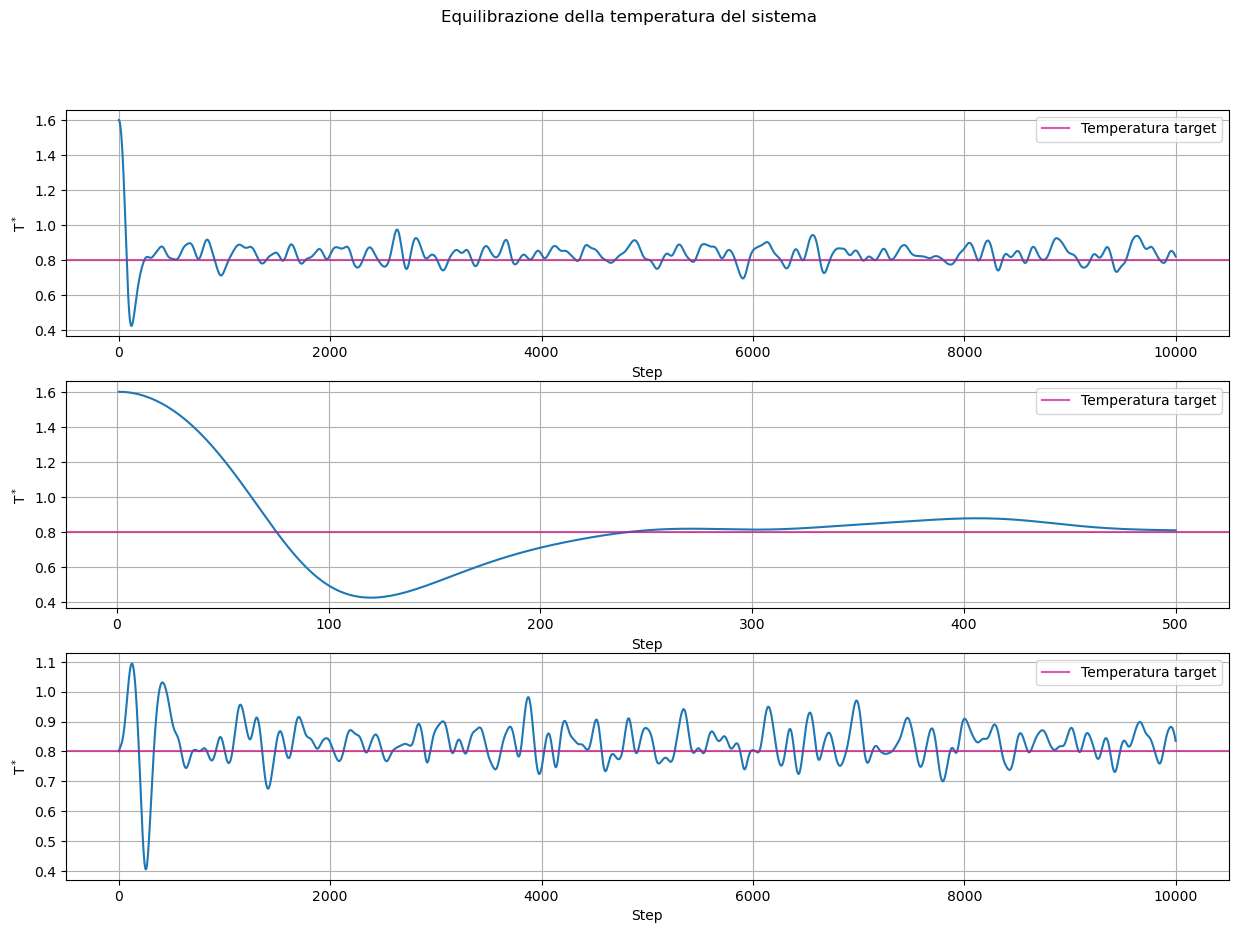

In [2]:
Ntot=10000  #passi totali della simulazione
xeqtot=np.arange(Ntot)+1  #T di equilibrazione la plotto in base agli steps, non faccio media a blocchi, faccio +1 perchè indicizza da 0 np.arange
solTeqtot=np.loadtxt("SolidState/eqtemptot.dat", delimiter=" ", usecols=0,  unpack="true")  #vettore delle ordinate dei punti plottati

Npar=500  #passi della simulazione parziale
xeqpar=np.arange(Npar)+1  #T di equilibrazione la plotto in base agli steps, non faccio media a blocchi, faccio +1 perchè indicizza da 0 np.arange
solTeqpar=np.loadtxt("SolidState/eqtemppar.dat", delimiter=" ", usecols=0,  unpack="true")  #vettore delle ordinate dei punti plottati

solTeqfin=np.loadtxt("SolidState/eqtempfin.dat", delimiter=" ", usecols=0,  unpack="true")  #vettore delle ordinate dei punti plottati

sfig ,(splt1, splt2, splt3) = plt.subplots(3, 1, figsize=(15, 10))

splt1.plot(xeqtot, solTeqtot)
splt1.axhline(y=0.8, color="mediumvioletred", label="Temperatura target", alpha=0.7)
splt1.set_xlabel("Step")
splt1.set_ylabel(r"$\mathrm{T^*}$")
splt1.grid(True)
splt1.legend()

splt2.plot(xeqpar, solTeqpar)
splt2.axhline(y=0.8, color="mediumvioletred", label="Temperatura target", alpha=0.7)
splt2.set_xlabel("Step")
splt2.set_ylabel(r"$\mathrm{T^*}$")
splt2.grid(True)
splt2.legend()

splt3.plot(xeqtot, solTeqfin)
splt3.axhline(y=0.8, color="mediumvioletred", label="Temperatura target", alpha=0.7)
splt3.set_xlabel("Step")
splt3.set_ylabel(r"$\mathrm{T^*}$")
splt3.grid(True)
splt3.legend()

sfig.suptitle("Equilibrazione della temperatura del sistema")
plt.show()

Faccio misura di temperatura del sistema a ogni step, vedo che poco dopo l'inizio ho equilibrazione, allora rifaccio andare la simulazione solo sul primo pezzettino (quello che considero il tempo di equilibrazione) e do le configurazioni finali di questo pezzo come configurazioni iniziali delle prossime simulazioni. In questo modo le simulazioni seguenti vengono già svolte sul sistema in equilibrio, la temperatura oscilla ancora ma effettivamente facendola partire dalla temperatura target la media resta quella. CONTROLLA CHE SIA GIUSTO!!!

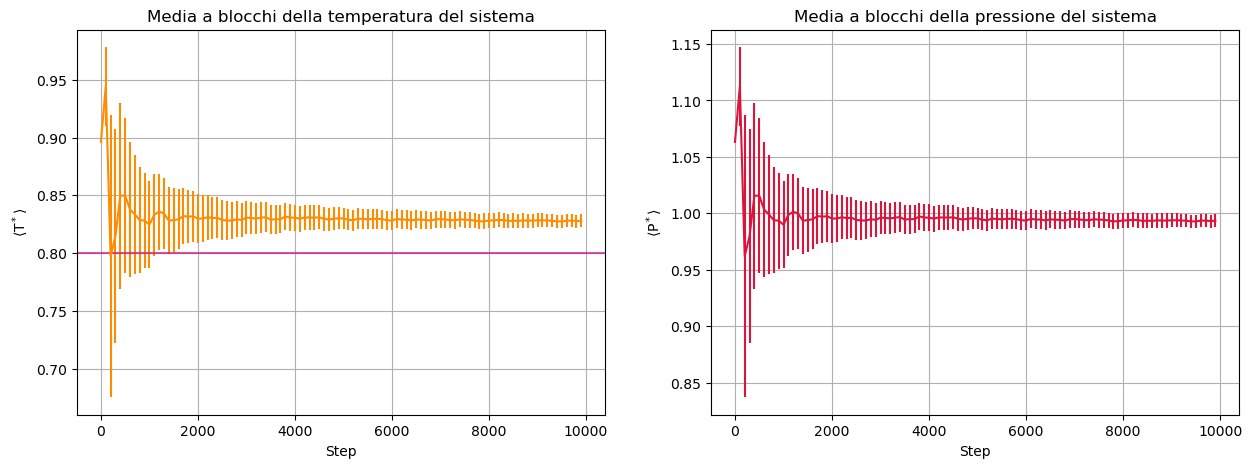

In [3]:
Nblock=100  #numero blocchi simulazione
xblocks=np.arange(Nblock)*(Ntot/Nblock)+1  #sulle ascisse numero step corrispondenti al blocco in esame

solTemps, solTempErrs=np.loadtxt("SolidState/temperature.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati
solPress, solPresErrs=np.loadtxt("SolidState/pressure.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati

sbfig ,(sbplt1, sbplt2) = plt.subplots(1, 2, figsize=(15, 5))

sbplt1.errorbar(xblocks, solTemps, yerr=solTempErrs, color="darkorange")
sbplt1.axhline(y=0.8, color="mediumvioletred", label="Temperatura target", alpha=0.7)
sbplt1.set_xlabel("Step")
sbplt1.set_ylabel(r"$\left<\mathrm{T^*}\right>$")
sbplt1.set_title("Media a blocchi della temperatura del sistema")
sbplt1.grid(True)

sbplt2.errorbar(xblocks, solPress, yerr=solPresErrs, color="crimson")
sbplt2.set_xlabel("Step")
sbplt2.set_ylabel(r"$\left<\mathrm{P^*}\right>$")
sbplt2.set_title("Media a blocchi della pressione del sistema")
sbplt2.grid(True)

plt.show()

Temo ci sia qualcosa di sbagliato ma non capisco...

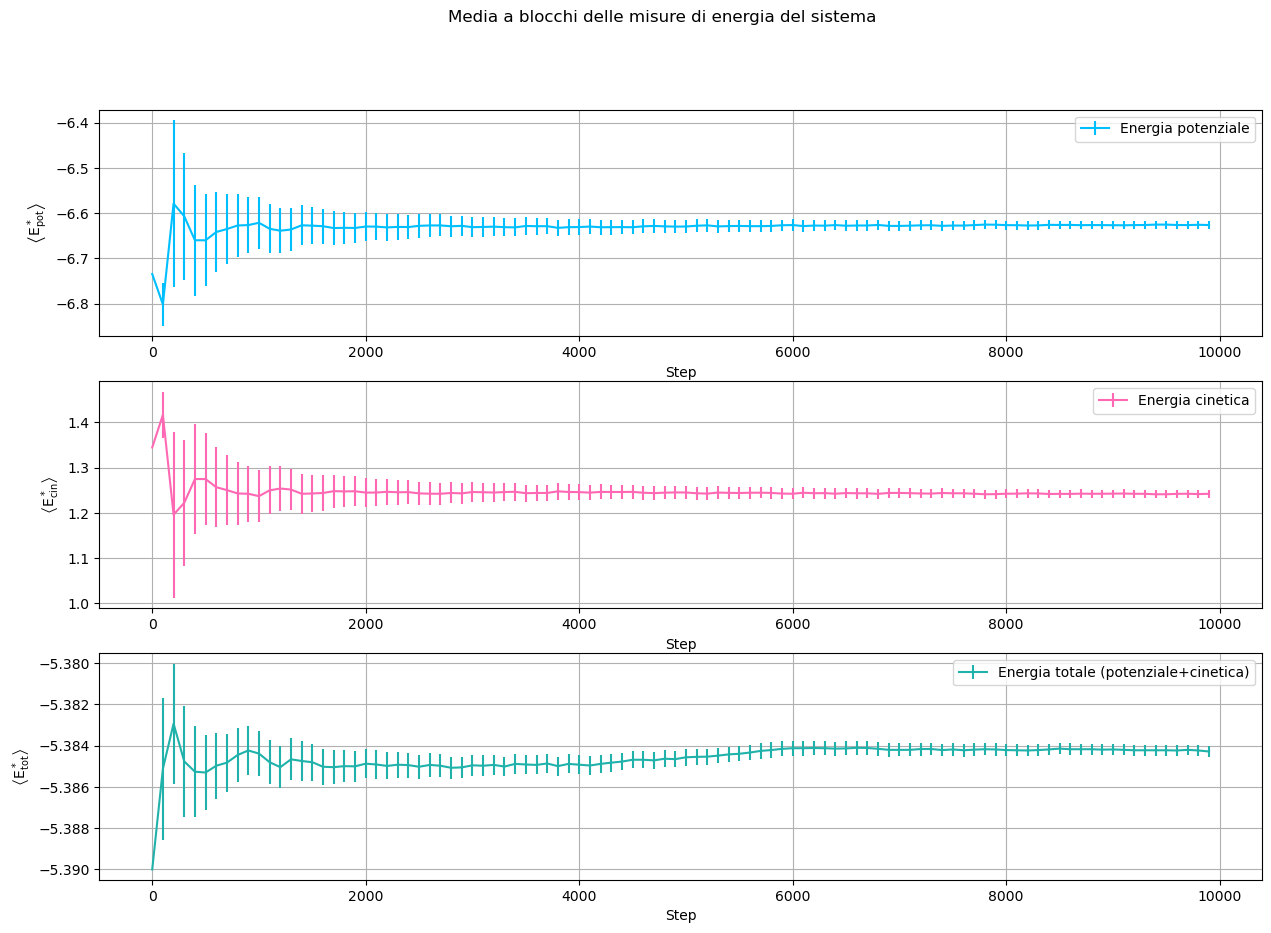

In [4]:
solPens, solPenErrs=np.loadtxt("SolidState/potential_energy.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati
solKens, solKenErrs=np.loadtxt("SolidState/kinetic_energy.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati
solTens, solTenErrs=np.loadtxt("SolidState/total_energy.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati

sefig ,(seplt1, seplt2, seplt3) = plt.subplots(3, 1, figsize=(15, 10))

seplt1.errorbar(xblocks, solPens, yerr=solPenErrs, label="Energia potenziale", color="deepskyblue")
seplt1.set_xlabel("Step")
seplt1.set_ylabel(r"$\left<\mathrm{E_{pot}^*}\right>$")
seplt1.legend()
seplt1.grid(True)

seplt2.errorbar(xblocks, solKens, yerr=solKenErrs, label="Energia cinetica", color="hotpink")
seplt2.set_xlabel("Step")
seplt2.set_ylabel(r"$\left<\mathrm{E_{cin}^*}\right>$")
seplt2.legend()
seplt2.grid(True)

seplt3.errorbar(xblocks, solTens, yerr=solTenErrs, label="Energia totale (potenziale+cinetica)", color="lightseagreen")
seplt3.set_xlabel("Step")
seplt3.set_ylabel(r"$\left<\mathrm{E_{tot}^*}\right>$")
seplt3.legend()
seplt3.grid(True)

sefig.suptitle("Media a blocchi delle misure di energia del sistema")
plt.show()

## Stato liquido

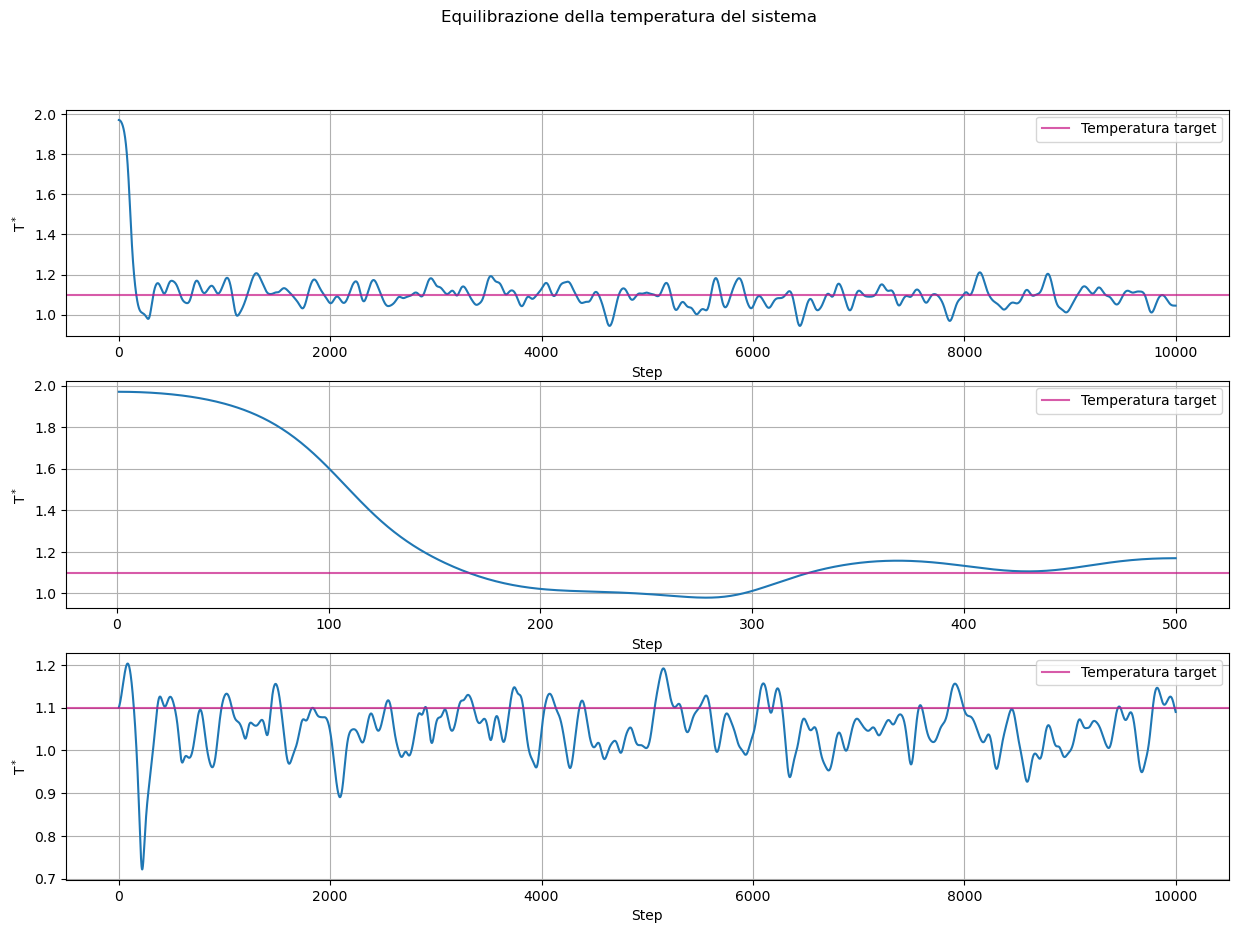

In [5]:
liqTeqtot=np.loadtxt("LiquidState/eqtemptot.dat", delimiter=" ", usecols=0,  unpack="true")  #vettore delle ordinate dei punti plottati
liqTeqpar=np.loadtxt("LiquidState/eqtemppar.dat", delimiter=" ", usecols=0,  unpack="true")  #vettore delle ordinate dei punti plottati
liqTeqfin=np.loadtxt("LiquidState/eqtempfin.dat", delimiter=" ", usecols=0,  unpack="true")  #vettore delle ordinate dei punti plottati

lfig ,(lplt1, lplt2, lplt3) = plt.subplots(3, 1, figsize=(15, 10))

lplt1.plot(xeqtot, liqTeqtot)
lplt1.axhline(y=1.1, color="mediumvioletred", label="Temperatura target", alpha=0.7)
lplt1.set_xlabel("Step")
lplt1.set_ylabel(r"$\mathrm{T^*}$")
lplt1.grid(True)
lplt1.legend()

lplt2.plot(xeqpar, liqTeqpar)
lplt2.axhline(y=1.1, color="mediumvioletred", label="Temperatura target", alpha=0.7)
lplt2.set_xlabel("Step")
lplt2.set_ylabel(r"$\mathrm{T^*}$")
lplt2.grid(True)
lplt2.legend()

lplt3.plot(xeqtot, liqTeqfin)
lplt3.axhline(y=1.1, color="mediumvioletred", label="Temperatura target", alpha=0.7)
lplt3.set_xlabel("Step")
lplt3.set_ylabel(r"$\mathrm{T^*}$")
lplt3.grid(True)
lplt3.legend()

lfig.suptitle("Equilibrazione della temperatura del sistema")
plt.show()

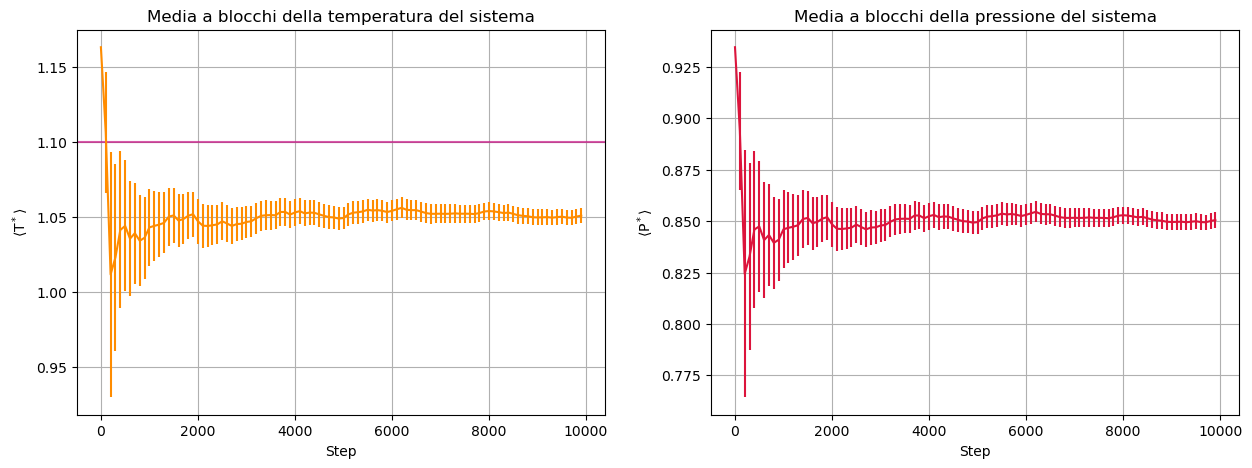

In [6]:
liqTemps, liqTempErrs=np.loadtxt("LiquidState/temperature.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati
liqPress, liqPresErrs=np.loadtxt("LiquidState/pressure.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati

lbfig ,(lbplt1, lbplt2) = plt.subplots(1, 2, figsize=(15, 5))

lbplt1.errorbar(xblocks, liqTemps, yerr=liqTempErrs, color="darkorange")
lbplt1.axhline(y=1.1, color="mediumvioletred", label="Temperatura target", alpha=0.7)
lbplt1.set_xlabel("Step")
lbplt1.set_ylabel(r"$\left<\mathrm{T^*}\right>$")
lbplt1.set_title("Media a blocchi della temperatura del sistema")
lbplt1.grid(True)

lbplt2.errorbar(xblocks, liqPress, yerr=liqPresErrs, color="crimson")
lbplt2.set_xlabel("Step")
lbplt2.set_ylabel(r"$\left<\mathrm{P^*}\right>$")
lbplt2.set_title("Media a blocchi della pressione del sistema")
lbplt2.grid(True)

plt.show()

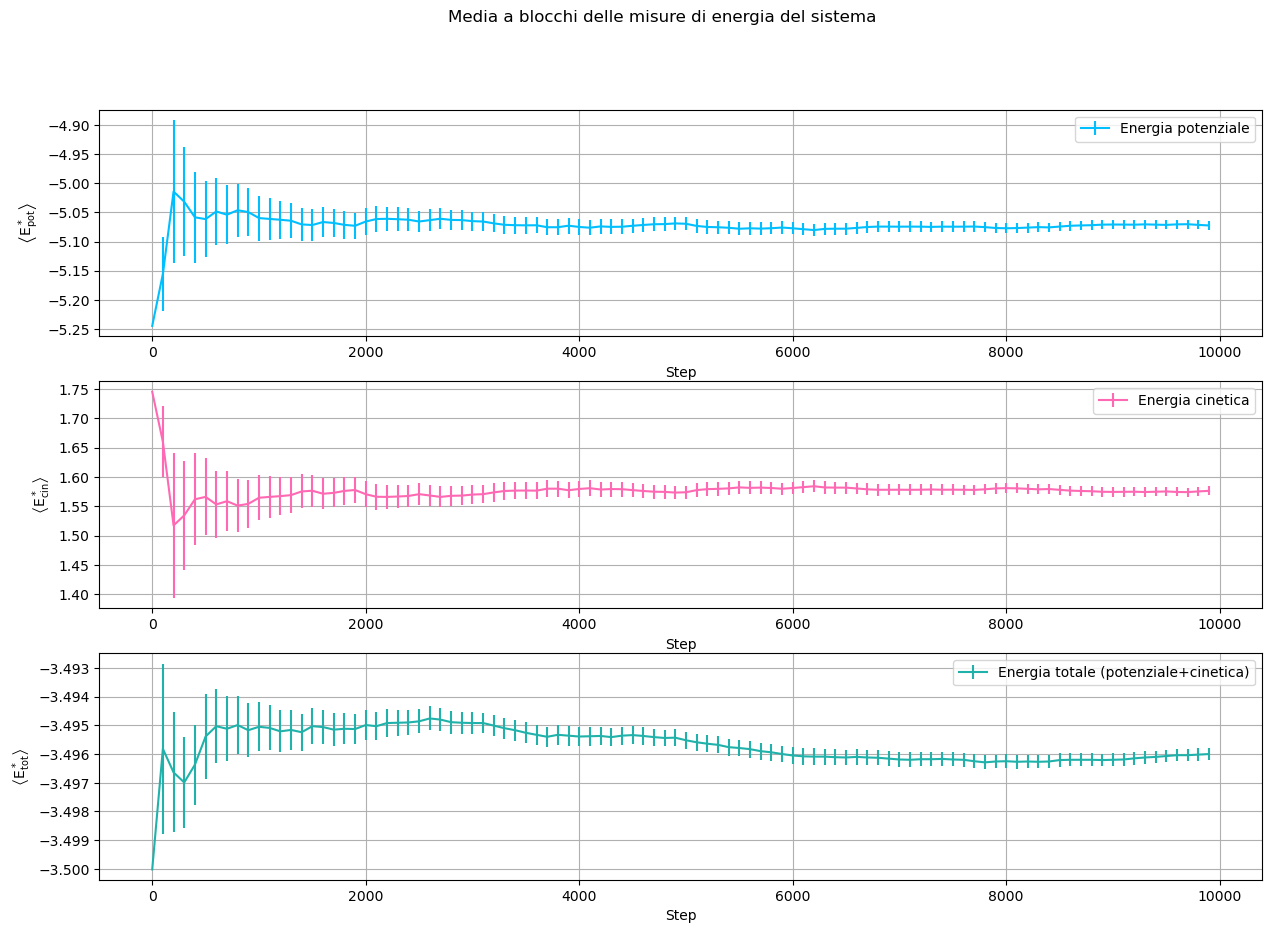

In [7]:
liqPens, liqPenErrs=np.loadtxt("LiquidState/potential_energy.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati
liqKens, liqKenErrs=np.loadtxt("LiquidState/kinetic_energy.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati
liqTens, liqTenErrs=np.loadtxt("LiquidState/total_energy.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati

lefig ,(leplt1, leplt2, leplt3) = plt.subplots(3, 1, figsize=(15, 10))

leplt1.errorbar(xblocks, liqPens, yerr=liqPenErrs, label="Energia potenziale", color="deepskyblue")
leplt1.set_xlabel("Step")
leplt1.set_ylabel(r"$\left<\mathrm{E_{pot}^*}\right>$")
leplt1.legend()
leplt1.grid(True)

leplt2.errorbar(xblocks, liqKens, yerr=liqKenErrs, label="Energia cinetica", color="hotpink")
leplt2.set_xlabel("Step")
leplt2.set_ylabel(r"$\left<\mathrm{E_{cin}^*}\right>$")
leplt2.legend()
leplt2.grid(True)

leplt3.errorbar(xblocks, liqTens, yerr=liqTenErrs, label="Energia totale (potenziale+cinetica)", color="lightseagreen")
leplt3.set_xlabel("Step")
leplt3.set_ylabel(r"$\left<\mathrm{E_{tot}^*}\right>$")
leplt3.legend()
leplt3.grid(True)

lefig.suptitle("Media a blocchi delle misure di energia del sistema")
plt.show()

## Stato gassoso

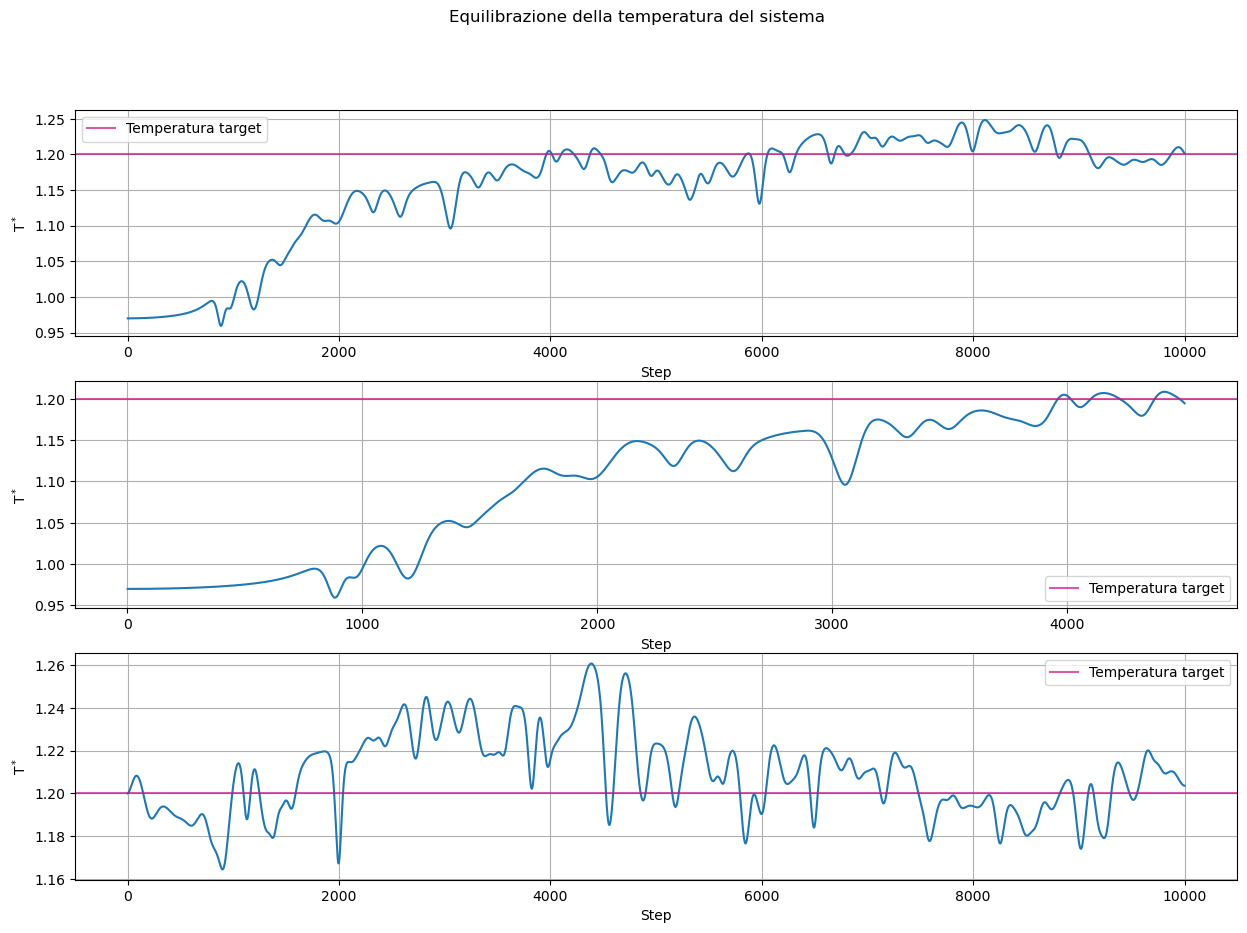

In [8]:
Gpar=4500
xeqg=np.arange(Gpar)+1

gasTeqtot=np.loadtxt("GasState/eqtemptot.dat", delimiter=" ", usecols=0,  unpack="true")  #vettore delle ordinate dei punti plottati
gasTeqpar=np.loadtxt("GasState/eqtemppar.dat", delimiter=" ", usecols=0,  unpack="true")  #vettore delle ordinate dei punti plottati
gasTeqfin=np.loadtxt("GasState/eqtempfin.dat", delimiter=" ", usecols=0,  unpack="true")  #vettore delle ordinate dei punti plottati

gfig ,(gplt1, gplt2, gplt3) = plt.subplots(3, 1, figsize=(15, 10))

gplt1.plot(xeqtot, gasTeqtot)
gplt1.axhline(y=1.2, color="mediumvioletred", label="Temperatura target", alpha=0.7)
gplt1.set_xlabel("Step")
gplt1.set_ylabel(r"$\mathrm{T^*}$")
gplt1.grid(True)
gplt1.legend()

gplt2.plot(xeqg, gasTeqpar)
gplt2.axhline(y=1.2, color="mediumvioletred", label="Temperatura target", alpha=0.7)
gplt2.set_xlabel("Step")
gplt2.set_ylabel(r"$\mathrm{T^*}$")
gplt2.grid(True)
gplt2.legend()

gplt3.plot(xeqtot, gasTeqfin)
gplt3.axhline(y=1.2, color="mediumvioletred", label="Temperatura target", alpha=0.7)
gplt3.set_xlabel("Step")
gplt3.set_ylabel(r"$\mathrm{T^*}$")
gplt3.grid(True)
gplt3.legend()

gfig.suptitle("Equilibrazione della temperatura del sistema")
plt.show()

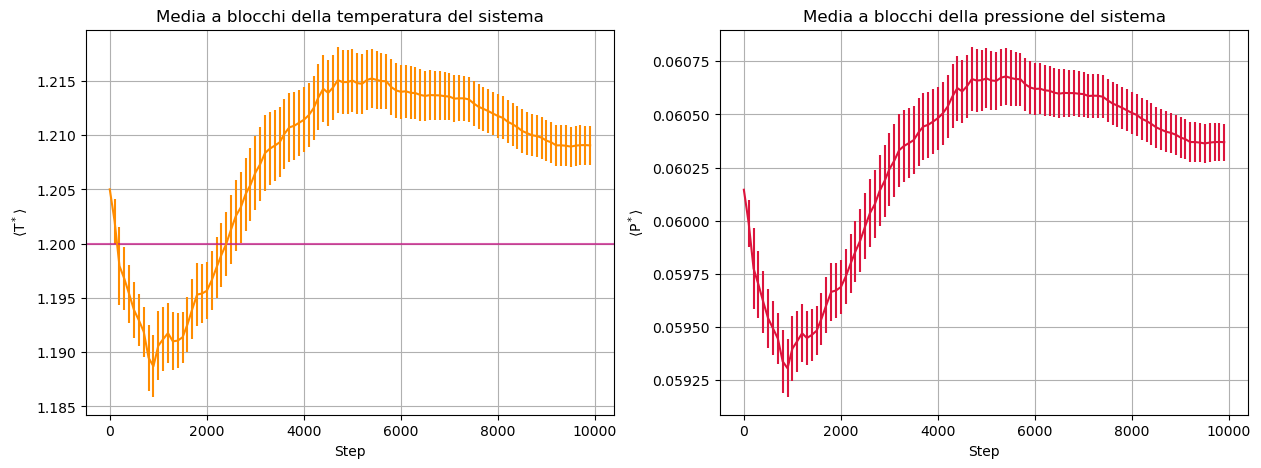

In [9]:
gasTemps, gasTempErrs=np.loadtxt("GasState/temperature.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati
gasPress, gasPresErrs=np.loadtxt("GasState/pressure.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati

gbfig ,(gbplt1, gbplt2) = plt.subplots(1, 2, figsize=(15, 5))

gbplt1.errorbar(xblocks, gasTemps, yerr=gasTempErrs, color="darkorange")
gbplt1.axhline(y=1.2, color="mediumvioletred", label="Temperatura target", alpha=0.7)
gbplt1.set_xlabel("Step")
gbplt1.set_ylabel(r"$\left<\mathrm{T^*}\right>$")
gbplt1.set_title("Media a blocchi della temperatura del sistema")
gbplt1.grid(True)

gbplt2.errorbar(xblocks, gasPress, yerr=gasPresErrs, color="crimson")
gbplt2.set_xlabel("Step")
gbplt2.set_ylabel(r"$\left<\mathrm{P^*}\right>$")
gbplt2.set_title("Media a blocchi della pressione del sistema")
gbplt2.grid(True)

plt.show()

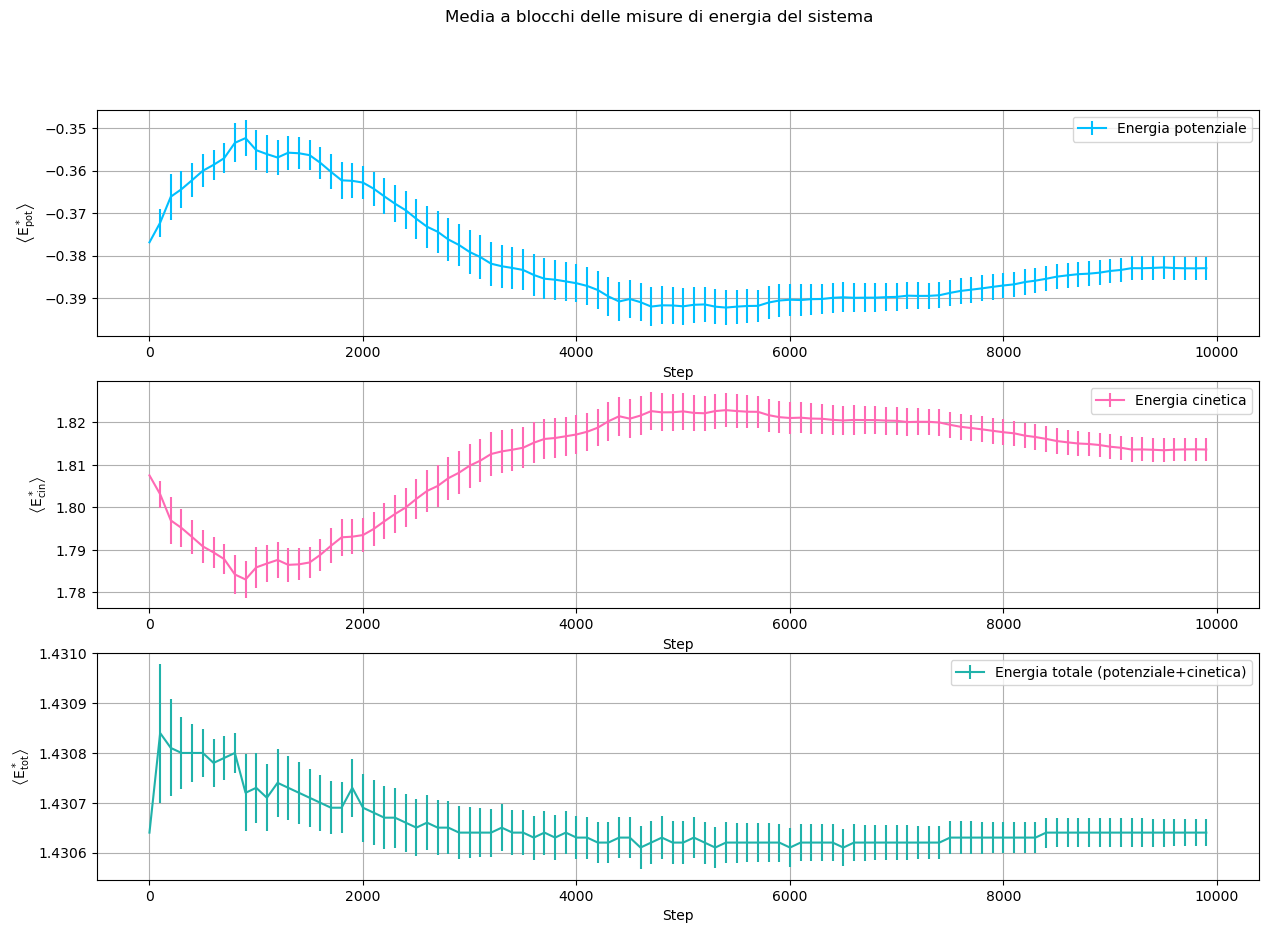

In [10]:
gasPens, gasPenErrs=np.loadtxt("GasState/potential_energy.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati
gasKens, gasKenErrs=np.loadtxt("GasState/kinetic_energy.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati
gasTens, gasTenErrs=np.loadtxt("GasState/total_energy.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati

gefig ,(geplt1, geplt2, geplt3) = plt.subplots(3, 1, figsize=(15, 10))

geplt1.errorbar(xblocks, gasPens, yerr=gasPenErrs, label="Energia potenziale", color="deepskyblue")
geplt1.set_xlabel("Step")
geplt1.set_ylabel(r"$\left<\mathrm{E_{pot}^*}\right>$")
geplt1.legend()
geplt1.grid(True)

geplt2.errorbar(xblocks, gasKens, yerr=gasKenErrs, label="Energia cinetica", color="hotpink")
geplt2.set_xlabel("Step")
geplt2.set_ylabel(r"$\left<\mathrm{E_{cin}^*}\right>$")
geplt2.legend()
geplt2.grid(True)

geplt3.errorbar(xblocks, gasTens, yerr=gasTenErrs, label="Energia totale (potenziale+cinetica)", color="lightseagreen")
geplt3.set_xlabel("Step")
geplt3.set_ylabel(r"$\left<\mathrm{E_{tot}^*}\right>$")
geplt3.legend()
geplt3.grid(True)

gefig.suptitle("Media a blocchi delle misure di energia del sistema")
plt.show()

Non mi convince l'equilibrazione perchè tutti gli stati sono super sballati rispetto alla temperatura target....